In [ ]:
!pip install bar_chart_race

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import requests
from bs4 import BeautifulSoup

import bar_chart_race as bcr
from IPython.display import Video

plt.style.use('ggplot')

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 6.7 MB/s 


In [ ]:
df = pd.read_excel('solicitacoes-de-reconhecimento-da-condicao-de-refugiado.xlsx',
                  )
df.head()

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
0,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,12/2001,DF,1.0
1,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,01/2010,DF,1.0
2,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,03/2010,DF,2.0
3,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,03/2010,SP,2.0
4,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,08/2010,DF,1.0


In [ ]:
df.shape


(11670, 5)

In [ ]:
df.dtypes


Tipo de Alertas e Restrições     object
Nacionalidade                    object
Mês/Ano                          object
UF                               object
Quantidade                      float64
dtype: object

In [ ]:
df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'].str.replace('/', ''), format='%m%Y', errors='coerce')
df['Year'] = df['Mês/Ano'].dt.year

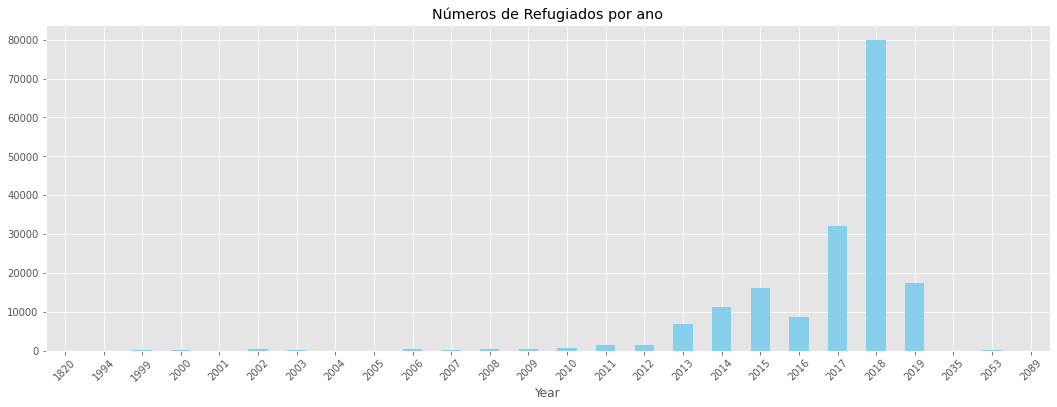

In [ ]:
df.groupby('Year')['Quantidade'].sum().plot(kind='bar', rot=45, figsize=(18,6), color='skyblue', title='Números de Refugiados por ano')

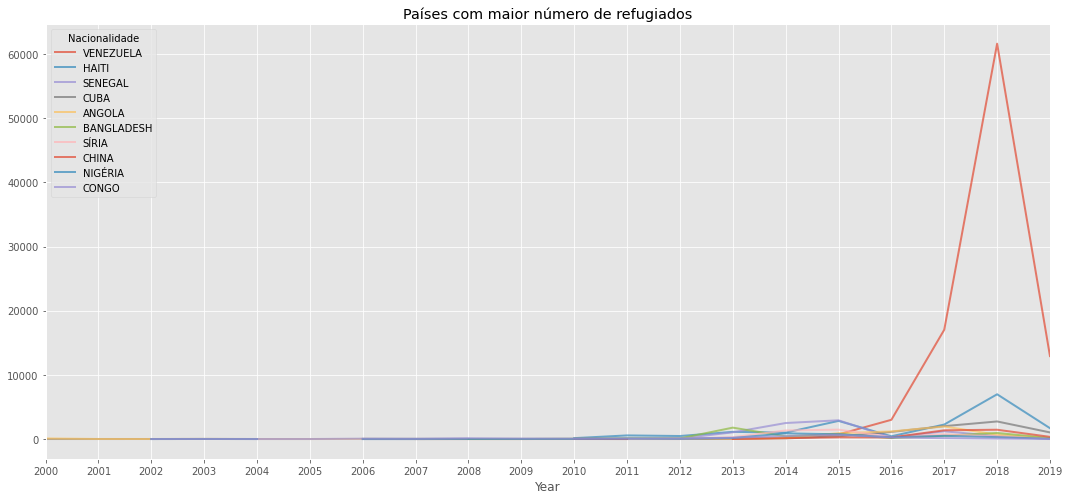

In [ ]:
df_paises = df.groupby(['Year', 'Nacionalidade'])['Quantidade'].sum().unstack()
top_10 = df.groupby('Nacionalidade')['Quantidade'].sum().sort_values(ascending=False)[:10]
df_paises[top_10.index.to_list()].plot(figsize=(18,8), linewidth=2, alpha=0.7)
plt.title('Países com maior número de refugiados')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019);

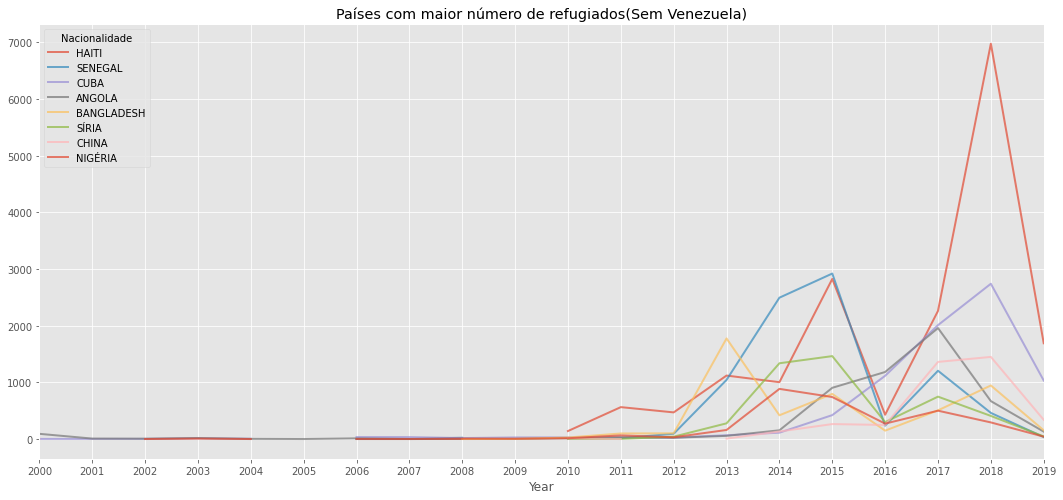

In [ ]:
df_paises[top_10.index.to_list()[1:-1]].plot(figsize=(18,8), linewidth=2, alpha=0.7)
plt.title('Países com maior número de refugiados(Sem Venezuela)')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019);

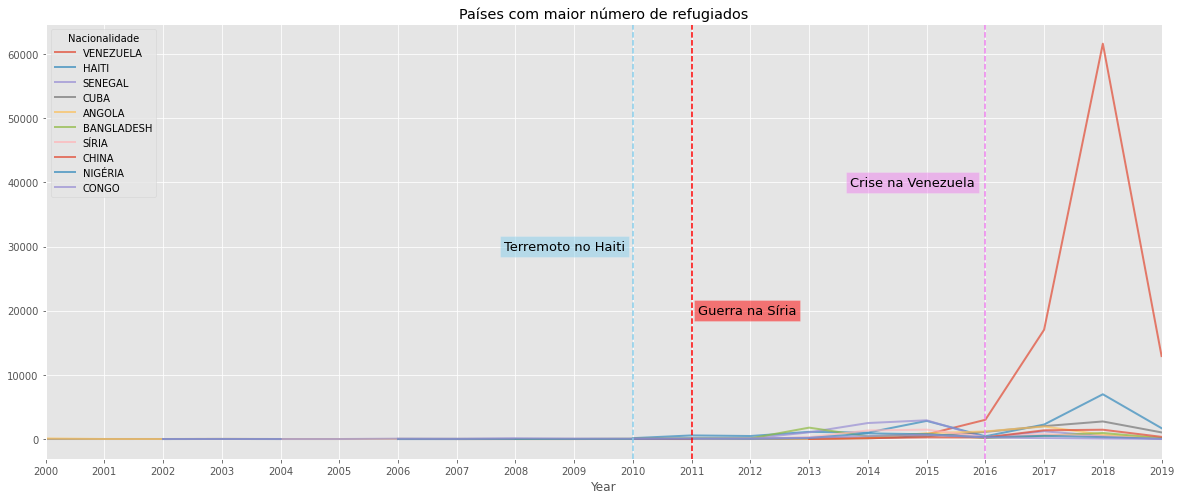

In [ ]:
df_paises[top_10.index.to_list()].plot(figsize=(20,8), linewidth=2, alpha=0.7)
plt.title('Países com maior número de refugiados')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019)
plt.axvline(x=2010, linestyle='--', color='skyblue')
plt.axvline(x=2011, linestyle='--', color='red')
plt.axvline(x=2016, linestyle='--', color='violet')
plt.text(2007.8, 30000, 'Terremoto no Haiti', va='center', bbox=dict(facecolor='skyblue', alpha=0.5), fontsize=13)
plt.text(2011.1, 20000, 'Guerra na Síria', va='center', bbox=dict(facecolor='red', alpha=0.5), fontsize=13)
plt.text(2013.7, 40000, 'Crise na Venezuela', va='center', bbox=dict(facecolor='violet', alpha=0.5), fontsize=13);

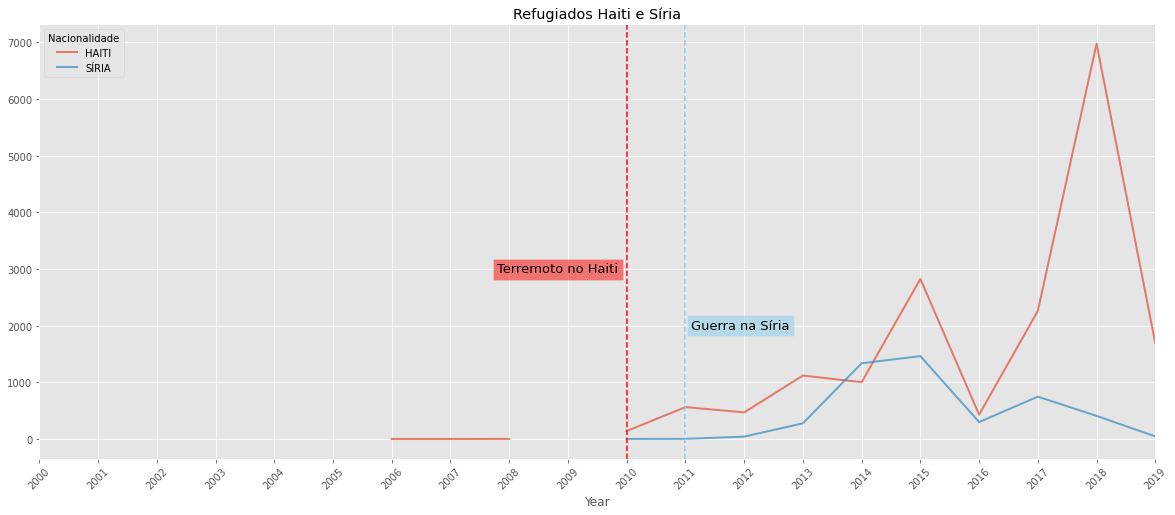

In [ ]:
df_paises[['HAITI', 'SÍRIA']].plot(figsize=(20,8), linewidth=2, alpha=0.7, rot=45)
plt.title('Refugiados Haiti e Síria')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlim(2000, 2019)
plt.axvline(x=2010, linestyle='--', color='red')
plt.axvline(x=2011, linestyle='--', color='skyblue')
plt.text(2007.8, 3000, 'Terremoto no Haiti', va='center', bbox=dict(facecolor='red', alpha=0.5), fontsize=13)
plt.text(2011.1, 2000, 'Guerra na Síria', va='center', bbox=dict(facecolor='skyblue', alpha=0.5), fontsize=13);